In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return (x**2-4)*np.sin(2*x)
N=20
X=np.linspace(-3,3,N)
y = f(X)

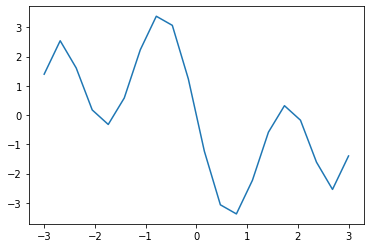

In [3]:
plt.plot(X,y)

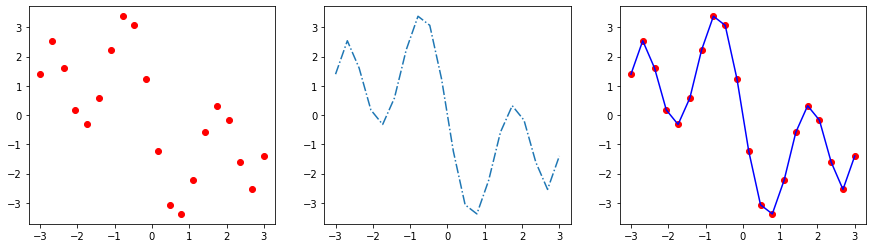

In [4]:
fig, axes = plt.subplots(figsize=(15,4), nrows=1, ncols=3, sharex='col')
axes[0].scatter(X,y,c='r')
axes[1].plot(X,y, '-.')
axes[2].scatter(X,y,c='r')
axes[2].plot(X,y,c='b')

In [5]:
print(type(X), type(y))
print(np.shape(X), np.shape(y))
print(X)
print(y)
print('The first 4 entries of X: ', X[:4])
print('From the 17th entry of y until the end:', y[16:])
print('The last 3 entries of y: ', y[-3:])
                                      

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20,) (20,)
[-3.         -2.68421053 -2.36842105 -2.05263158 -1.73684211 -1.42105263
 -1.10526316 -0.78947368 -0.47368421 -0.15789474  0.15789474  0.47368421
  0.78947368  1.10526316  1.42105263  1.73684211  2.05263158  2.36842105
  2.68421053  3.        ]
[ 1.39707749  2.53969131  1.60893713  0.17517845 -0.32060239  0.58434009
  2.22898545  3.37661913  3.06536036  1.23452535 -1.23452535 -3.06536036
 -3.37661913 -2.22898545 -0.58434009  0.32060239 -0.17517845 -1.60893713
 -2.53969131 -1.39707749]
The first 4 entries of X:  [-3.         -2.68421053 -2.36842105 -2.05263158]
From the 17th entry of y until the end: [-0.17517845 -1.60893713 -2.53969131 -1.39707749]
The last 3 entries of y:  [-1.60893713 -2.53969131 -1.39707749]


In [6]:
np.random.seed(5)
dim = 1000
vectors=np.random.normal(0, 5.0, (2, dim))

In [7]:
np.shape(vectors)

(2, 1000)

In [8]:
def dot_for_loop(vecs):
    dotproduct=0.
    dim = np.shape(vecs)[1]
    for j in range(dim):
        dotproduct +=vecs[0][j]*vecs[1][j]
    return dotproduct

def dot_no_loop(vecs):
    dim = np.shape(vecs)[1]
    return np.dot(vecs[0], vecs[1])

In [9]:
%%timeit
dot_for_loop(vectors)

747 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%%timeit
dot_no_loop(vectors)

1.83 µs ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
print(dot_no_loop(vectors))
print(dot_for_loop(vectors))

707.7342277112893
707.73422771129


In [12]:
def linear_simple(x):
    return -2.5*x
Xtrain1 = np.linspace(-1,1,3)
np.random.seed(10)
n3 = np.random.normal(0,1.0,3)
ytrain1= linear_simple(Xtrain1) + n3

x=  [-1.  0.  1.] y=  [ 3.8315865   0.71527897 -4.04540029] noise added=  [ 1.3315865   0.71527897 -1.54540029]


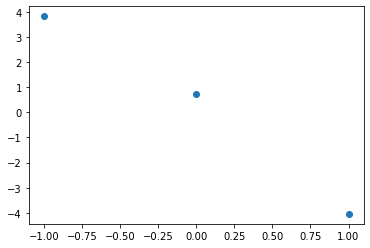

In [13]:
print('x= ', Xtrain1, "y= ", ytrain1,'noise added= ', n3)
plt.scatter(Xtrain1, ytrain1)

[ 0. -1. -2. -3. -4. -5. -6.]


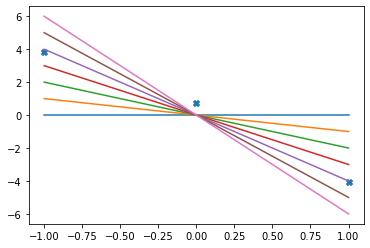

In [14]:
wlist = np.asarray([0.,-1.,-2.,-3.,-4.,-5.,-6.])
print(wlist)
X = np.linspace(-1,1,50)
plt.scatter(Xtrain1, ytrain1, marker='X')
for i in range(len(wlist)):
    plt.plot(X,wlist[i]*X)

In [15]:
wrange = np.linspace(-6,0,6)
print(wrange)
print(type(wrange))
for w in wrange:
    print(w*Xtrain1-ytrain1)

[-6.  -4.8 -3.6 -2.4 -1.2  0. ]
<class 'numpy.ndarray'>
[ 2.1684135  -0.71527897 -1.95459971]
[ 0.9684135  -0.71527897 -0.75459971]
[-0.2315865  -0.71527897  0.44540029]
[-1.4315865  -0.71527897  1.64540029]
[-2.6315865  -0.71527897  2.84540029]
[-3.8315865  -0.71527897  4.04540029]


In [16]:
for w in wrange:
    print("for weight: ", w, "we get a loss of: ", np.sum((w*Xtrain1-ytrain1)**2))

for weight:  -6.0 we get a loss of:  9.034101118368394
for weight:  -4.8 we get a loss of:  2.0188694293462808
for weight:  -3.6 we get a loss of:  0.7636377403241693
for weight:  -2.4000000000000004 we get a loss of:  5.268406051302055
for weight:  -1.2000000000000002 we get a loss of:  15.533174362279944
for weight:  0.0 we get a loss of:  31.557942673257834


In [17]:
def mse(w, x, y):
    return np.mean((np.multiply(w,x)-y)**2)
def l1e(w, x, y):
    return np.mean((np.abs(np.multiply(w,x)-y)))
def rmse(w, x, y):
    return np.sqrt(mse(w, x, y))

print("Mean squared errors:")
for w in wrange:
    print(mse(w,Xtrain1,ytrain1))
    
print("Absolute value of residuals:")
for w in wrange:
    print(l1e(w,Xtrain1,ytrain1))
    
print("Root mean squared error ")
for w in wrange:
    print(rmse(w, Xtrain1, ytrain1))

Mean squared errors:
3.011367039456131
0.6729564764487602
0.25454591344138977
1.7561353504340182
5.177724787426648
10.519314224419277
Absolute value of residuals:
1.6127640593858732
0.8127640593858728
0.46408859021306403
1.2640885902130639
2.064088590213064
2.8640885902130635
Root mean squared error 
1.7353290867890536
0.8203392447327875
0.5045254338895016
1.3251925710756223
2.2754614449440025
3.2433492294878263


In [18]:
def ar_mse(w, x, y):
    return np.array([mse(wi, x, y) for wi in w])
def ar_rmse(w, x, y):
    return np.array([rmse(wi, x, y) for wi in w])
def ar_l1e(w, x, y):
    return np.array([l1e(wi, x, y) for wi in w])

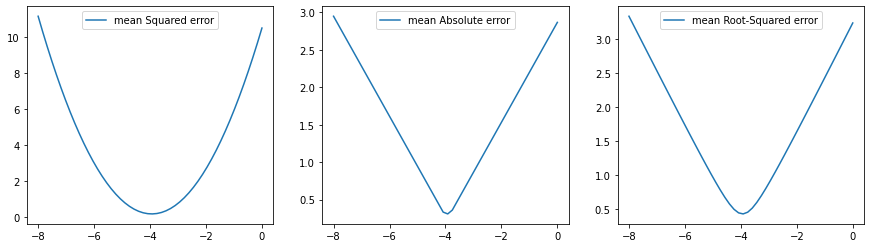

In [19]:
wlims = np.linspace(-8, 0, 50)
fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3)
ax[0].plot(wlims, ar_mse(wlims, Xtrain1, ytrain1), label='mean Squared error')
ax[0].legend()
ax[1].plot(wlims, ar_l1e(wlims, Xtrain1, ytrain1), label='mean Absolute error')
ax[1].legend()
ax[2].plot(wlims, ar_rmse(wlims, Xtrain1, ytrain1), label='mean Root-Squared error')
ax[2].legend()

In [20]:
mse_array = ar_mse(wlims,Xtrain1, ytrain1)
wbest, least_error = (wlims[np.argmin(mse_array)],np.min(mse_array))
rmse_array = ar_rmse(wlims, Xtrain1, ytrain1)
wbestroot, least_error_root = (wlims[np.argmin(rmse_array)],np.min(rmse_array))
print(wbest, least_error)
print(wbestroot, least_error_root)

-3.9183673469387754 0.1784307650181058
-3.9183673469387754 0.4224106592145916


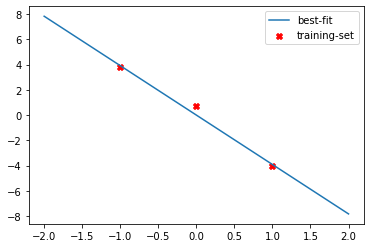

In [22]:
#plotting fit with optimal weight
X = np.linspace(-2,2,50)
plt.plot(X,wbest*X, label='best-fit')
plt.scatter(Xtrain1, ytrain1, c='r', marker='X', label='training-set')
plt.legend()

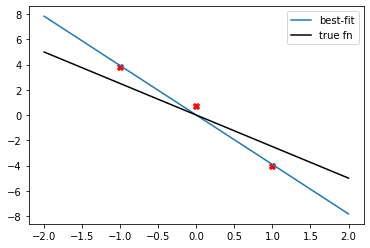

In [25]:
X = np.linspace (-2,2,50)
plt.plot(X,wbest*X, label='best-fit') # Best fit line
plt.plot(X, -2.5*X, c='k', label='true fn') # Noise free line from data was generated
plt.scatter(Xtrain1, ytrain1, c='r', marker='X') #data points
plt.legend()

In [28]:
npts = 10
Xtrain2 = np.linspace(-1,1,npts)
noise = np.random.normal(0,1.0, npts)
ytrain2 = linear_simple(Xtrain2) + noise #generate some more points from the same function

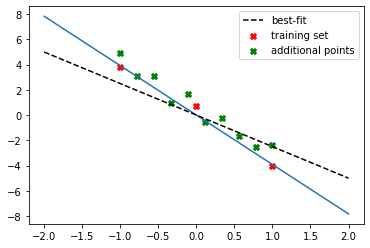

In [31]:
X = np.linspace(-2,2,10)
plt.plot(X, wbest*X)
plt.plot(X, -2.5*X, '--', c='k', label='best-fit')
plt.scatter(Xtrain1, ytrain1, c='r', marker='X', label='training set')
plt.scatter(Xtrain2, ytrain2, c='g', marker='X', label='additional points')
plt.legend()

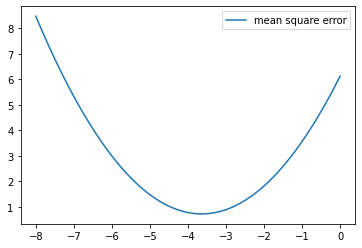

In [38]:
# plotting the loss function with this new set
wlims = np.linspace(-8,0,1000)
loss = ar_mse(wlims, Xtrain2, ytrain2)
plt.plot(wlims, loss, label='mean square error')
plt.legend()

In [36]:
#finding optimal weight
wbest, least_error = (wlims[np.argmin(loss)], np.min(loss))
print("w* is ", wbest, "and with loss value of ", least_error )

w* is  -3.643643643643644 and with loss value of  0.7256372323755409


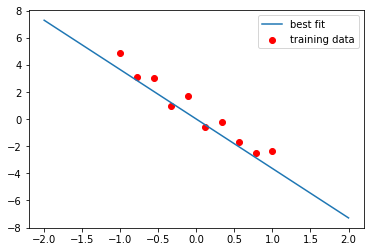

In [39]:
X = np.linspace(-2,2,10)
plt.scatter(Xtrain2, ytrain2, c='r', label='training data')
plt.plot(X, wbest*X, label='best fit')
plt.legend()

In [40]:
npts = 20 
Xtrain3 = np.linspace(-1,1,npts)
noise = np.random.normal(0,1.0,npts)
ytrain3 = linear_simple(Xtrain3) + noise 

Text(0.5, 1.0, 'Mean square loss function')

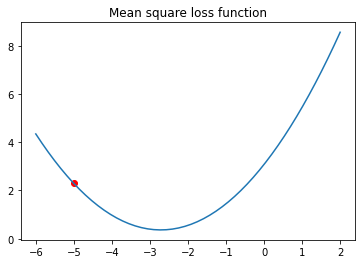

In [44]:
wlims = np.linspace(-6,2,50)
plt.plot(wlims, ar_mse(wlims, Xtrain3, ytrain3))
plt.scatter([-5.], ar_mse ([-5.], Xtrain3, ytrain3), c='r')
plt.title("Mean square loss function")

In [45]:
def loss_slope_w1(w1, Xtrain, ytrain):
    return (2/len(Xtrain)) * (np.dot(w1*Xtrain - ytrain, Xtrain))

In [46]:
print("slope of loss fn =", loss_slope_w1(-5.0, Xtrain3, ytrain3), ", mse loss fn = ", mse(-5., Xtrain3, ytrain3))

slope of loss fn = -1.6838557575751012 , mse loss fn =  2.2904293681543764


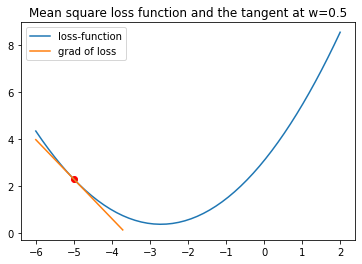

In [49]:
plt.plot(wlims, ar_mse(wlims, Xtrain3, ytrain3), label='loss-function')
plt.scatter([-5.], ar_mse ([-5.], Xtrain3, ytrain3), c='r')
gw = loss_slope_w1(-5.0, Xtrain3, ytrain3)
loss = mse (-5., Xtrain3, ytrain3)
plt.plot(wlims[:15], gw*(wlims[:15]+5.) + loss, label = 'grad of loss')
plt.title('Mean square loss function and the tangent at w=0.5')
plt.legend()

In [50]:
def gradientdescent0(initialweight, X, y, rate, numiter):
    whistory = []
    msehistory = []
    w = initialweight
    for i in range(numiter):
        loss = mse(w, X,y)
        whistory.append(w)
        msehistory.append(loss)
        grad = loss_slope_w1(w, X, y)
        w = w - rate * grad
    return w, np.asarray(whistory), np.asarray(msehistory)

In [53]:
print('numiter = 1:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 1))
print('numiter = 2:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 2))
print('numiter = 3:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 3))


numiter = 1:
 (-4.66322884848498, array([-5.]), array([2.29042937]))
numiter = 2:
 (-4.376087129824805, array([-5.        , -4.66322885]), array([2.29042937, 1.76513973]))
numiter = 3:
 (-4.131261032861919, array([-5.        , -4.66322885, -4.37608713]), array([2.29042937, 1.76513973, 1.38326435]))
numiter = 15:
 (-2.9238660414713484, array([-5.        , -4.66322885, -4.37608713, -4.13126103, -3.92251457,
       -3.74453075, -3.59277612, -3.46338533, -3.35306265, -3.25899806,
       -3.17879561, -3.11041248, -3.05210686, -3.00239364, -2.96000658]), array([2.29042937, 1.76513973, 1.38326435, 1.10564835, 0.9038269 ,
       0.75710662, 0.65044382, 0.57290204, 0.51653066, 0.47554977,
       0.44575745, 0.42409901, 0.40835375, 0.39690725, 0.38858587]))
numiter = 100:
 (-2.714767458463232, array([-5.        , -4.66322885, -4.37608713, -4.13126103, -3.92251457,
       -3.74453075, -3.59277612, -3.46338533, -3.35306265, -3.25899806,
       -3.17879561, -3.11041248, -3.05210686, -3.00239364, -2

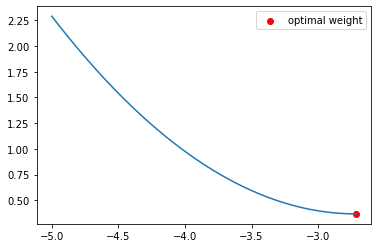

In [66]:
wbest, whistory, msehistory = gradientdescent0(-5., Xtrain3, ytrain3,0.01, 10000)
plt.scatter(wbest, msehistory[-1], c='r', label='optimal weight')
plt.plot(whistory, msehistory)
plt.legend()

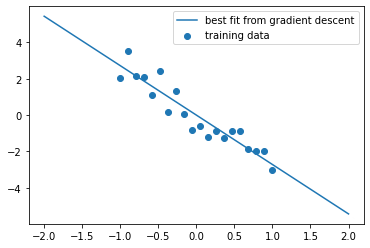

In [68]:
X = np.linspace(-2., 2.0, 10)
plt.scatter(Xtrain3, ytrain3, label='training data')
plt.plot(X, wbest*X, label='best fit from gradient descent')
plt.legend()


In [74]:
def linear_fit(X, y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1

In [76]:
w0, w1 = linear_fit(Xtrain3, ytrain3)
print ("w0: ", w0, " w1: ", w1)

w0:  -0.020410152095839244  w1:  -2.7147671861480775


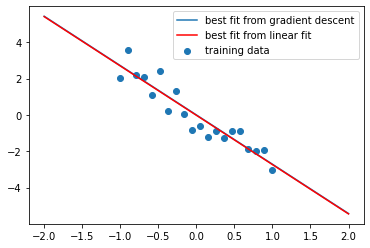

In [77]:
X = np.linspace(-2., 2.0, 10)
plt.scatter(Xtrain3, ytrain3, label='training data')
plt.plot(X, wbest*X, label='best fit from gradient descent')
plt.plot(X, w1*X+w0, c='r', label='best fit from linear fit')
plt.legend()

In [86]:
# men's 100m sprint times
olympics100m = np.asarray([1900,11,
1904,11,
1906,11.2,
1908,10.8,
1912,10.8,
1920,10.8,
1924,10.6,
1928,10.8,
1932,10.3,
1936,10.3,
1948,10.3,
1952,10.4,
1956,10.5,
1960,10.2,
1964,10,
1968,9.95,
1972,10.14,
1976,10.06,
1980,10.25,
1984,9.99,
1988,9.92,
1992,9.96,
1996,9.84,
2000,9.87,
2004,9.85,
2008,9.69,
2012,9.63,
2016,9.81]);

# women's 100m sprint times
olympics100f=np.asarray([
1948, 11.90,
1952, 11.50,
1956, 11.50,
1960, 11.00,
1964, 11.40,
1968, 11.08,
1972, 11.07,
1976, 11.08,
1980, 11.06,
1984, 10.97,
1988, 10.54,
1992, 10.82,
1996, 10.94,
2000, 10.75,
2004, 10.93,
2008, 10.78,
2012, 10.75,
2016, 10.71])

In [87]:
# formatting data
taxis = np.linspace(1890, 2050, 100)
otime_m = olympics100m[1::2]
otime_f = olympics100f[1::2]
odate_m = olympics100m[::2]
odate_f = olympics100f[::2]

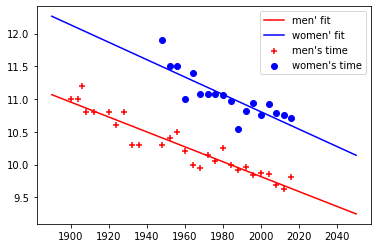

In [92]:
m_w0, m_w1 = linear_fit(odate_m, otime_m)
f_w0, f_w1 = linear_fit(odate_f, otime_f)
plt.scatter(odate_m, otime_m, c='r', marker='+', label='men\'s time')
plt.scatter(odate_f, otime_f, c='b', marker='o', label='women\'s time')
plt.plot(taxis, m_w1 * taxis + m_w0, c='r', label='men\' fit')
plt.plot(taxis, f_w1 * taxis + f_w0, c='b', label='women\' fit')
plt.legend()

In [84]:
def denny_logistic_m(year): 
    (mn, mx, tof, k) = (9.44, 10.3, 1972, .063) # denny  10.330 (10.165 10.495) 9.439 0.063 1971.65
    speed = 3.6*(mn + (mx - mn)/(1 + np.exp(-k*(year - tof))))
    return speed
def denny_logistic_f(year): # denny 9.297 (9.222 9.373) 8.277 0.109 1963.27
    (mn, mx, tof, k) = (8.28, 9.3, 1963, .11) # denny 9.439
    speed = 3.6*(mn + (mx - mn)/(1 + np.exp(-k*(year - tof))))
    return speed

[Text(0.5, 1.0, 'speed of Olympics sprinters')]

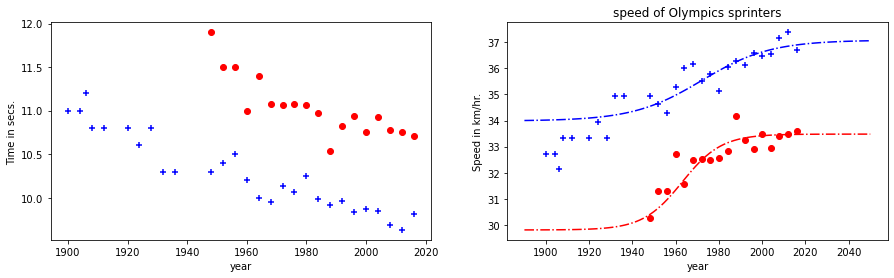

In [85]:
odate_m = olympics100m[::2]
odate_f = olympics100f[::2]
taxis = np.linspace(1890, 2050, 100)
otime_m = olympics100m[1::2]
otime_f = olympics100f[1::2]
fig, ax = plt.subplots(figsize=(15,4),nrows=1, ncols=2)
ax[0].scatter(odate_m, otime_m, c='b', marker = '+')
ax[0].scatter(odate_f, otime_f, c='r', marker = 'o')
ax[0].set(xlabel="year", ylabel="Time in secs.")
ax[1].scatter(odate_m, (360/otime_m),c='b', marker ='+')
ax[1].scatter(odate_f, (360/otime_f),c='r', marker ='o')
ax[1].plot(taxis, denny_logistic_m(taxis), c='b', ls = "-.")
ax[1].plot(taxis, denny_logistic_f(taxis), c='r', ls = "-.")
ax[1].set(xlabel="year", ylabel="Speed in km/hr.")
ax[1].set(title = "speed of Olympics sprinters")